In [1]:
import gmplot
import pandas as pd
import requests 
import os
import math
from xml.etree.ElementTree import fromstring, ElementTree
from datetime import datetime
import json
import statistics 
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TrafficEvents = None

chunk_size = 1000

BASE_PATH = "/home/amin/CETI/RoadConstruction/TrafficEventData/part/speeds/speed_"
    
index_folder = 0
index_start_point_file = 0
index_end_point_file = 411

In [3]:
def read_data(path):
    data = None
    data = pd.read_csv(path)
    return data

In [4]:
print("start time is {}".format(datetime.now()))
for i in range(index_start_point_file, index_end_point_file):
    type_of_ways_all_points = []
    path = BASE_PATH + str(index_folder) + "/" + str(i) + "_file_"+ str(i) + ".csv"
    
    data = read_data(path)
    TrafficEvents = data.append(TrafficEvents, ignore_index = True)
print("end time is {}".format(datetime.now()))

start time is 2020-09-09 23:37:01.420611
end time is 2020-09-09 23:38:49.964658


In [5]:
class Location(object):
    def __init__(self, osrm_data):
        self.longitude = osrm_data[0]
        self.latitude = osrm_data[1]

In [6]:
points = []

for index, data in TrafficEvents.iterrows():
    start_location = Location([data["StartPoint_Lng"], data["StartPoint_Lat"]])
    if "EndPoint_Lng" in data and "EndPoint_Lat" in data and not math.isnan(data["EndPoint_Lat"]):
        end_location = Location([data["EndPoint_Lng"], data["EndPoint_Lat"]])
    else:
        end_location = Location([data["StartPoint_Lng"], data["StartPoint_Lat"]])
            
    points.append(start_location)

In [7]:
locations = []
for point in points:
    randrange = random.randrange(0, 100)
    if randrange > 85:
        locations.append((point.latitude, point.longitude))


attractions_lats, attractions_lngs = zip(*locations)

In [8]:
apikey = ''
gmap = gmplot.GoogleMapPlotter(42.164798, -101.852231, 5, apikey=apikey)
gmap.scatter(attractions_lats, attractions_lngs, color='#0b30e6', size=4000, marker=False)
gmap.draw('scatter_map.html')

In [9]:
apikey = ''
gmap = gmplot.GoogleMapPlotter(42.164798, -101.852231, 5, apikey=apikey)
gmap.heatmap(attractions_lats, attractions_lngs)
gmap.draw('heatmap_map.html')

In [10]:
BBox = (TrafficEvents.StartPoint_Lng.min(), TrafficEvents.StartPoint_Lng.max(),      
         TrafficEvents.StartPoint_Lat.min(), TrafficEvents.StartPoint_Lat.max())

In [11]:
locations = []
for point in points:
    randrange = random.randrange(0, 100)
    if randrange > -1:
        locations.append((point.latitude, point.longitude))


attractions_lats, attractions_lngs = zip(*locations)


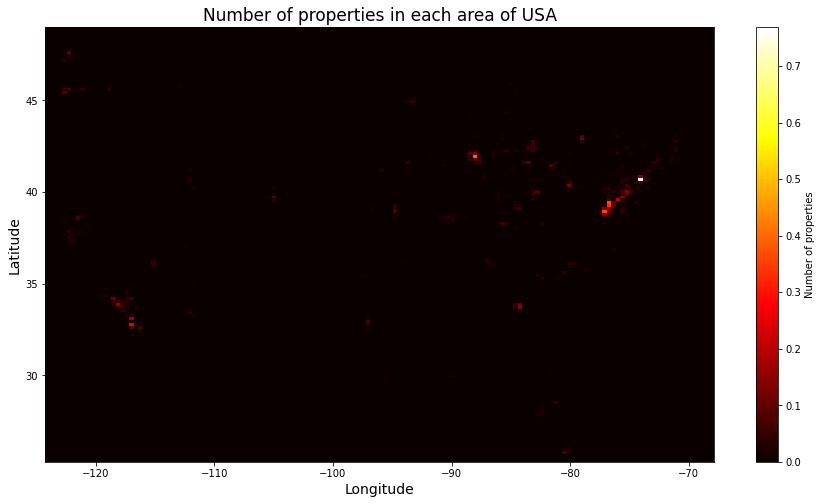

In [12]:
plt.figure(figsize = (15,8))
plt.hist2d(attractions_lngs, attractions_lats, bins=150, cmap='hot', density=True)
plt.colorbar().set_label('Number of properties')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Number of properties in each area of USA', fontsize=17)
plt.show()

In [13]:
def read_part_data(folder_id, index_start, index_end):
    df = None
    print("start time is {}".format(datetime.now()))
    for i in range(index_start, index_end):
        type_of_ways_all_points = []
        path = BASE_PATH + str(folder_id) + "/" + str(i) + "_file_"+ str(i) + ".csv"

        data = read_data(path)
        df = data.append(df, ignore_index = True)
    print("end time is {}".format(datetime.now()))
    return df

In [14]:
df = None
for i in range(0,8):
    print(i)
    data = read_part_data(i, 0, 411)
    df = data.append(df, ignore_index = True)
print(9)
data = read_part_data(9, 0, 393)
df = data.append(df, ignore_index = True)

0
start time is 2020-09-09 23:39:30.010272
end time is 2020-09-09 23:40:59.190675
1
start time is 2020-09-09 23:40:59.600228
end time is 2020-09-09 23:42:39.801968
2
start time is 2020-09-09 23:42:40.677538
end time is 2020-09-09 23:44:22.568375
3
start time is 2020-09-09 23:44:23.894071
end time is 2020-09-09 23:46:10.016243
4
start time is 2020-09-09 23:46:11.682990
end time is 2020-09-09 23:48:08.372795
5
start time is 2020-09-09 23:48:11.112721
end time is 2020-09-09 23:50:05.929924
6
start time is 2020-09-09 23:50:08.463374
end time is 2020-09-09 23:51:35.278975
7
start time is 2020-09-09 23:51:38.209178
end time is 2020-09-09 23:53:26.988623
9
start time is 2020-09-09 23:53:30.931365
end time is 2020-09-09 23:55:03.991396


In [15]:
df.head(-10)

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Circle,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta
0,M-29450881,MapQuest,Construction,406.0,3,44.309494,-90.840271,NaN,NaN,0.860000,...,False,False,"{'waypoints': [{'nodes': [2147408021, 47184371...","{'waypoints': [{'nodes': [2147408021, 47184371...","[2147408021, 471843710, 2147408024, 2147408021...","[2147408021, 471843710, 2147408024, 2147408021...",motorway_link,-100.000000,-100.0,-100.0
1,M-29450890,MapQuest,Construction,703.0,2,44.387669,-88.720055,NaN,NaN,0.120000,...,False,False,"{'waypoints': [{'nodes': [232006634, 232006479...","{'waypoints': [{'nodes': [232006634, 232006479...","[232006634, 232006479, 2281677742, 232006634, ...","[232006634, 232006479, 2281677742, 232006634, ...",trunk,-100.000000,-100.0,-100.0
2,M-29450891,MapQuest,Construction,703.0,2,44.403862,-88.734856,NaN,NaN,0.000000,...,False,False,"{'waypoints': [{'nodes': [232006387, 232006382...","{'waypoints': [{'nodes': [232006387, 232006382...","[232006387, 232006382, 232006382, 231764181, 2...","[232006387, 232006382, 232006382, 231764181, 2...",trunk,-100.000000,-100.0,-100.0
3,M-29450947,MapQuest,Construction,735.0,3,44.734169,-90.497337,NaN,NaN,0.100000,...,False,False,"{'waypoints': [{'nodes': [147039746, 147017038...","{'waypoints': [{'nodes': [147039746, 147017038...","[147039746, 147017038, 147017038, 147017035, 1...","[147039746, 147017038, 147017038, 147017035, 1...",residential,-100.000000,-100.0,-100.0
4,M-29450948,MapQuest,Construction,735.0,3,44.734177,-90.496017,NaN,NaN,0.100000,...,False,False,"{'waypoints': [{'nodes': [3372527386, 14701703...","{'waypoints': [{'nodes': [3372527386, 14701703...","[3372527386, 147017032, 3372527390, 147017032,...","[3372527386, 147017032, 3372527390, 147017032,...",primary,-100.000000,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840485,B-7462,Bing,Construction,NaN,2,41.931130,-83.358570,41.90569,-83.36915,1.839975,...,False,False,"{'waypoints': [{'nodes': [185322523, 633371374...","{'waypoints': [{'nodes': [30455284, 30455283],...","[185322523, 6333713747, 185322523, 6333713746,...","[30455284, 30455283, 185370968, 30455284, 1853...",motorway,25.036195,2974.3,118.8
1840486,B-7474,Bing,Construction,NaN,2,39.500000,-84.730310,39.44563,-84.68347,4.511450,...,False,False,"{'waypoints': [{'nodes': [1939361949, 34293678...","{'waypoints': [{'nodes': [5406321562, 19657888...","[1939361949, 3429367817, 3304362560, 193936194...","[5406321562, 196578886, 5406321562, 5406321561...",primary,14.749443,7275.9,493.3
1840487,B-7475,Bing,Construction,NaN,2,39.445630,-84.683470,39.50000,-84.73031,4.511450,...,False,False,"{'waypoints': [{'nodes': [5406321562, 19657888...","{'waypoints': [{'nodes': [1939361949, 34293678...","[5406321562, 196578886, 5406321562, 5406321561...","[1939361949, 3429367817, 3304362560, 193936194...",primary,14.749443,7275.9,493.3
1840488,B-7550,Bing,Construction,NaN,2,38.322830,-85.712850,38.34191,-85.70634,1.364702,...,False,False,"{'waypoints': [{'nodes': [0, 179028919], 'hint...","{'waypoints': [{'nodes': [179028948, 179028949...","[0, 179028919, 0, 6892598514, 0, 6892598514, 6...","[179028948, 179028949, 179028949, 3994619357, ...",trunk,22.170170,2214.8,99.9


In [16]:
df_state = df.loc[:, df.columns.intersection(['State', "Id", "Source"])]

In [17]:
df_state.head(-10)

,Id,Source,State
0,M-29450881,MapQuest,WI
1,M-29450890,MapQuest,WI
2,M-29450891,MapQuest,WI
3,M-29450947,MapQuest,WI
4,M-29450948,MapQuest,WI
...,...,...,...
1840485,B-7462,Bing,MI
1840486,B-7474,Bing,OH
1840487,B-7475,Bing,OH
1840488,B-7550,Bing,IN


In [18]:
df_state_group = df_state.groupby("State")

In [19]:
df_state_group.head()

,Id,Source,State
0,M-29450881,MapQuest,WI
1,M-29450890,MapQuest,WI
2,M-29450891,MapQuest,WI
3,M-29450947,MapQuest,WI
4,M-29450948,MapQuest,WI
...,...,...,...
32734,M-25768554,MapQuest,RI
37646,M-25156263,MapQuest,RI
37647,M-25156268,MapQuest,RI
37847,M-25184366,MapQuest,RI


In [20]:
df_state_count = df_state_group.size().reset_index(name='counts')

In [21]:
df_state_count.head()

,State,counts
0,AL,7541
1,AR,2524
2,AZ,22803
3,CA,228658
4,CO,90537


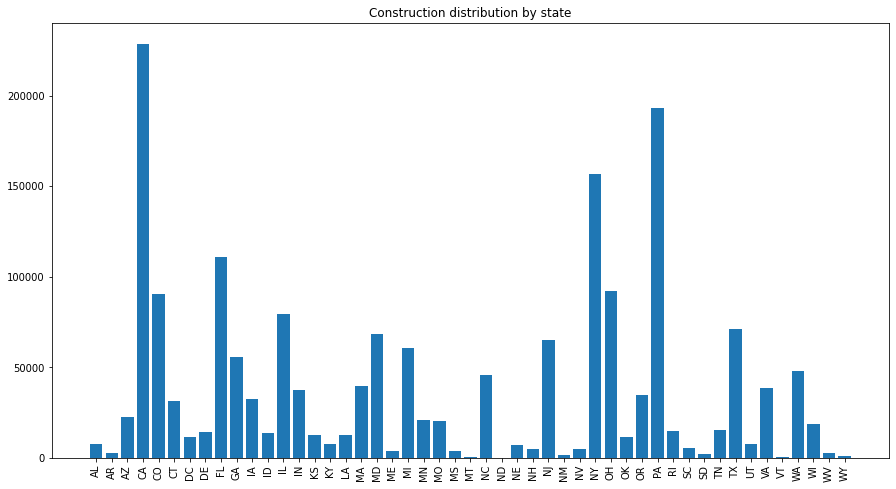

In [22]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count['State'], height=df_state_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state")
plt.savefig("construction_distribution_by_state.png")

In [23]:
df_state_count_sorted = df_state_count.sort_values(by=['counts'], ascending=False)

In [24]:
df_state_count_sorted.head(10)

,State,counts
3,CA,228658
36,PA,193447
32,NY,157022
8,FL,111021
33,OH,92174
4,CO,90537
12,IL,79710
41,TX,71227
18,MD,68387
29,NJ,65280


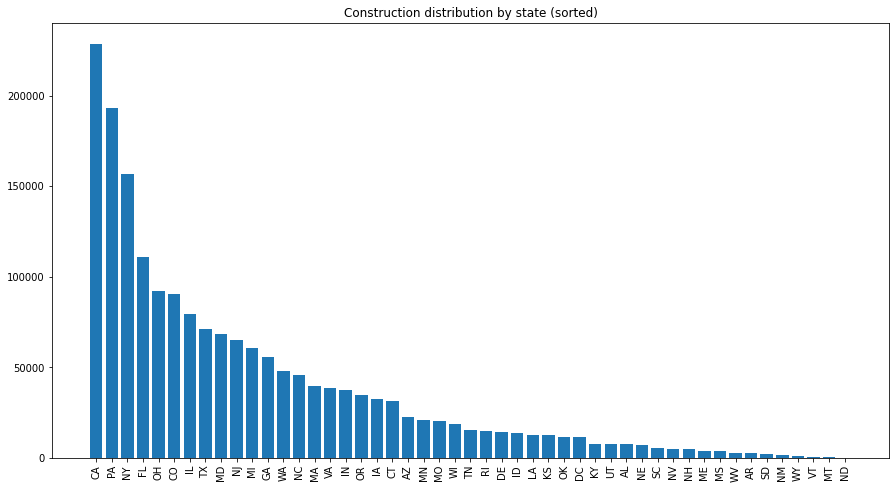

In [25]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_sorted['State'], height=df_state_count_sorted['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state (sorted)")
plt.savefig("construction_distribution_by_state_sorted.png")

In [26]:
df_state_MapQuest = df_state[df_state.Source == "MapQuest"]

In [27]:
df_state_MapQuest.head

<bound method NDFrame.head of                 Id    Source State
0       M-29450881  MapQuest    WI
1       M-29450890  MapQuest    WI
2       M-29450891  MapQuest    WI
3       M-29450947  MapQuest    WI
4       M-29450948  MapQuest    WI
...            ...       ...   ...
270995         M-9  MapQuest    OH
270996        M-10  MapQuest    OH
270997        M-11  MapQuest    OH
270998        M-12  MapQuest    OH
270999        M-13  MapQuest    OH

[270513 rows x 3 columns]>

In [28]:
df_state_MapQuest_group = df_state_MapQuest.groupby("State")

In [29]:
df_state_MapQuest_group.head()

,Id,Source,State
0,M-29450881,MapQuest,WI
1,M-29450890,MapQuest,WI
2,M-29450891,MapQuest,WI
3,M-29450947,MapQuest,WI
4,M-29450948,MapQuest,WI
...,...,...,...
32734,M-25768554,MapQuest,RI
37646,M-25156263,MapQuest,RI
37647,M-25156268,MapQuest,RI
37847,M-25184366,MapQuest,RI


In [30]:
df_state_MapQuest_group_count = df_state_MapQuest_group.size().reset_index(name='counts')

In [31]:
df_state_MapQuest_group_count.head()

,State,counts
0,AL,1868
1,AR,891
2,AZ,3161
3,CA,30140
4,CO,16777


In [32]:
df_state_MapQuest_group_count_sorted = df_state_MapQuest_group_count.sort_values(by=['counts'], ascending=False)

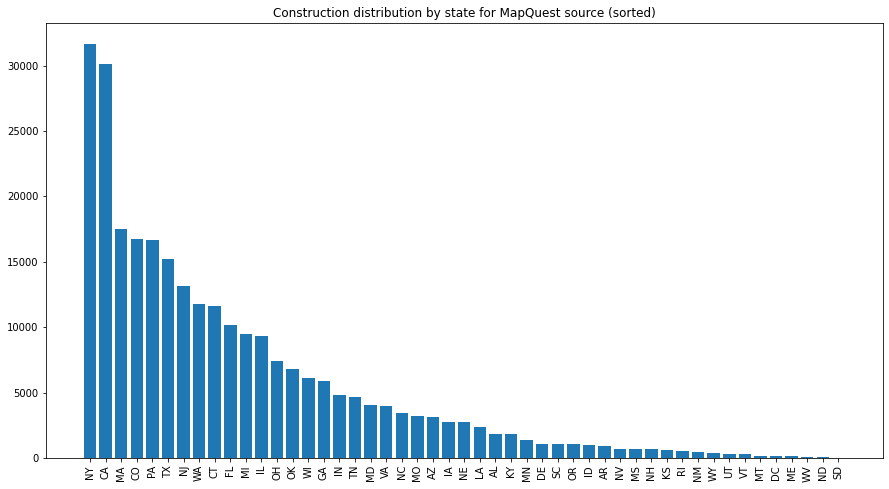

In [33]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_MapQuest_group_count_sorted['State'], height=df_state_MapQuest_group_count_sorted['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state for MapQuest source (sorted)")
plt.savefig("construction_distribution_by_state_MapQuest_sorted.png")

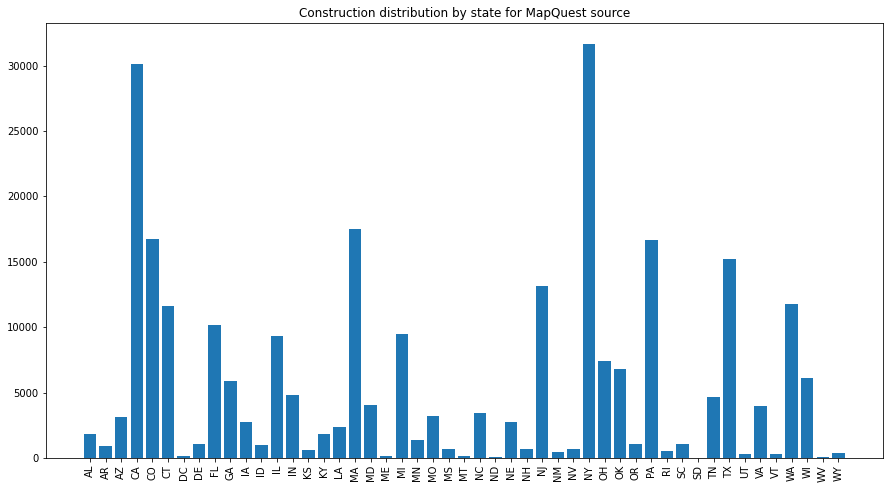

In [34]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_MapQuest_group_count['State'], height=df_state_MapQuest_group_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state for MapQuest source")
plt.savefig("construction_distribution_by_state_MapQuest.png")

In [35]:
df_state_Bing = df_state[df_state.Source != "MapQuest"]

In [36]:
df_state_Bing.head(-10)

,Id,Source,State
270500,B-8859744,Bing,TX
270501,B-8859745,Bing,TX
270502,B-8859747,Bing,TX
270503,B-8859749,Bing,TX
270504,B-8859750,Bing,TX
...,...,...,...
1840485,B-7462,Bing,MI
1840486,B-7474,Bing,OH
1840487,B-7475,Bing,OH
1840488,B-7550,Bing,IN


In [37]:
df_state_Bing_group = df_state_Bing.groupby("State")

In [38]:
df_state_Bing_group.head()

,Id,Source,State
270500,B-8859744,Bing,TX
270501,B-8859745,Bing,TX
270502,B-8859747,Bing,TX
270503,B-8859749,Bing,TX
270504,B-8859750,Bing,TX
...,...,...,...
304425,B-8756498,Bing,VT
304434,B-8756534,Bing,VT
311600,B-8732547,Bing,VT
334337,B-8659172,Bing,MT


In [39]:
df_state_Bing_group_count = df_state_Bing_group.size().reset_index(name='counts')

In [40]:
df_state_Bing_group_count.head()

,State,counts
0,AL,5673
1,AR,1633
2,AZ,19642
3,CA,198518
4,CO,73760


In [41]:
df_state_Bing_group_count_sorted = df_state_Bing_group_count.sort_values(by=['counts'], ascending=False)

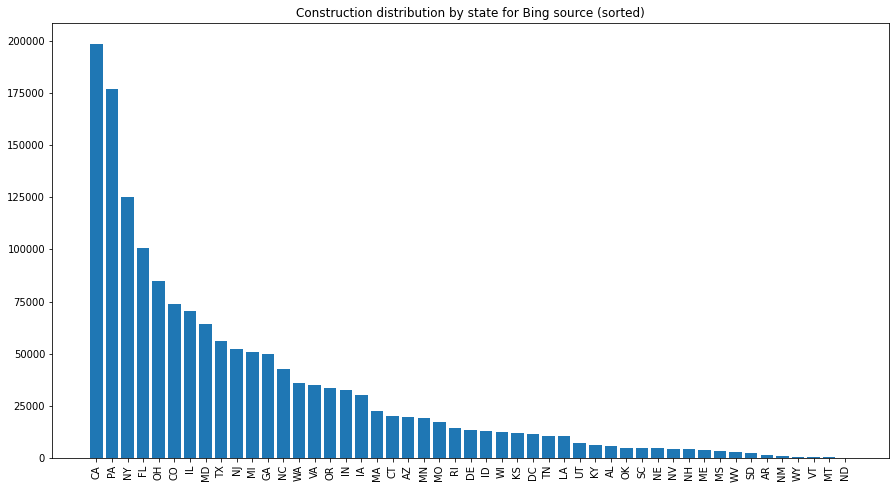

In [42]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_Bing_group_count_sorted['State'], height=df_state_Bing_group_count_sorted['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state for Bing source (sorted)")
plt.savefig("construction_distribution_by_state_Bing_sorted.png")

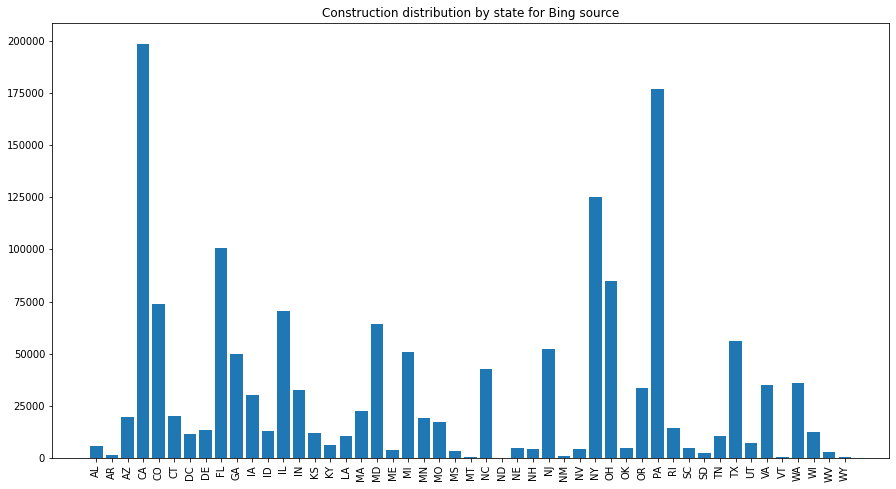

In [43]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_Bing_group_count['State'], height=df_state_Bing_group_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by state for Bing source")
plt.savefig("construction_distribution_by_state_Bing.png")

In [44]:
df_city = df.loc[:, df.columns.intersection(['City', 'State', "Id", "Source"])]

In [45]:
df_city.head()

,Id,Source,City,State
0,M-29450881,MapQuest,Black River Falls,WI
1,M-29450890,MapQuest,New London,WI
2,M-29450891,MapQuest,New London,WI
3,M-29450947,MapQuest,Loyal,WI
4,M-29450948,MapQuest,Loyal,WI


In [46]:
df_city_group = df_city.groupby("City")

In [47]:
df_city_group.head()

,Id,Source,City,State
0,M-29450881,MapQuest,Black River Falls,WI
1,M-29450890,MapQuest,New London,WI
2,M-29450891,MapQuest,New London,WI
3,M-29450947,MapQuest,Loyal,WI
4,M-29450948,MapQuest,Loyal,WI
...,...,...,...,...
1840394,B-6382,Bing,Cardington,OH
1840395,B-6383,Bing,Cardington,OH
1840396,B-6392,Bing,Leavittsburg,OH
1840397,B-6393,Bing,Leavittsburg,OH


In [48]:
df_city_group_count = df_city_group.size().reset_index(name='counts')

In [49]:
df_city_group_count.head()

,City,counts
0,Aaronsburg,6
1,Abbeville,20
2,Abbotsford,15
3,Abbott,9
4,Abbottstown,56


In [50]:
df_city_group_count_sorted = df_city_group_count.sort_values(by=['counts'], ascending=False)

In [51]:
df_city_group_count_sorted.head(20)

,City,counts
6830,New York,32755
353,Atlanta,28137
6167,Miami,28037
5586,Los Angeles,19818
7759,Pittsburgh,17540
4501,Houston,14306
7295,Orlando,13940
2440,Denver,13798
7665,Philadelphia,13787
10303,Washington,12576


In [52]:
population_path = "/home/amin/CETI/RoadConstruction/StatesPopulation.csv"

In [53]:
population_data = read_data(population_path)

In [54]:
population_data.head()

,Rank,State,July2019Estimate,PercentOfTotal,StateShort,LandArea(KM2)
0,1,California,39512223,11.91%,CA,403466
1,2,Texas,28995881,8.74%,TX,676587
2,3,Florida,21477737,6.47%,FL,138887
3,4,New York,19453561,5.86%,NY,122057
4,5,Illinois,12671821,3.86%,IL,143793


In [55]:
population_data["NewState"] = population_data["StateShort"]
population_data = population_data.drop("State", axis=1)

In [56]:
population_data.head()

,Rank,July2019Estimate,PercentOfTotal,StateShort,LandArea(KM2),NewState
0,1,39512223,11.91%,CA,403466,CA
1,2,28995881,8.74%,TX,676587,TX
2,3,21477737,6.47%,FL,138887,FL
3,4,19453561,5.86%,NY,122057,NY
4,5,12671821,3.86%,IL,143793,IL


In [57]:
df_state_count_population = df_state_count_sorted.set_index('State').join(population_data.set_index('StateShort'))

In [58]:
df_state_count_population.head()

,counts,Rank,July2019Estimate,PercentOfTotal,LandArea(KM2),NewState
State,,,,,,
CA,228658,1,39512223,11.91%,403466,CA
PA,193447,6,12801989,3.82%,115883,PA
NY,157022,4,19453561,5.86%,122057,NY
FL,111021,3,21477737,6.47%,138887,FL
OH,92174,7,11689100,3.52%,105829,OH


In [59]:
df_state_count_population["C_P_Rate"] = df_state_count_population["counts"] / df_state_count_population["July2019Estimate"]
df_state_count_population["P_C_Rate"] = df_state_count_population["July2019Estimate"] / df_state_count_population["counts"]

In [60]:
# df_state_count_sorted_population = df_state_count_sorted_population.astype({"Rate": int})

In [61]:
df_state_count_population.head()

,counts,Rank,July2019Estimate,PercentOfTotal,LandArea(KM2),NewState,C_P_Rate,P_C_Rate
State,,,,,,,,
CA,228658,1,39512223,11.91%,403466,CA,0.005787,172.800527
PA,193447,6,12801989,3.82%,115883,PA,0.015111,66.178276
NY,157022,4,19453561,5.86%,122057,NY,0.008072,123.890671
FL,111021,3,21477737,6.47%,138887,FL,0.005169,193.456526
OH,92174,7,11689100,3.52%,105829,OH,0.007885,126.815588


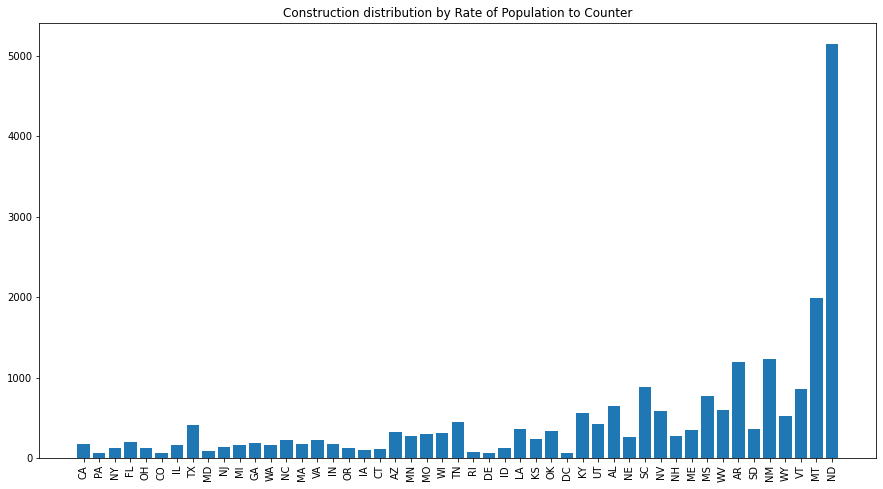

In [62]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['P_C_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Population to Counter")
plt.savefig("construction_distribution_by_Rate_Population_Counter.png")

In [63]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['P_C_Rate'], ascending=False)

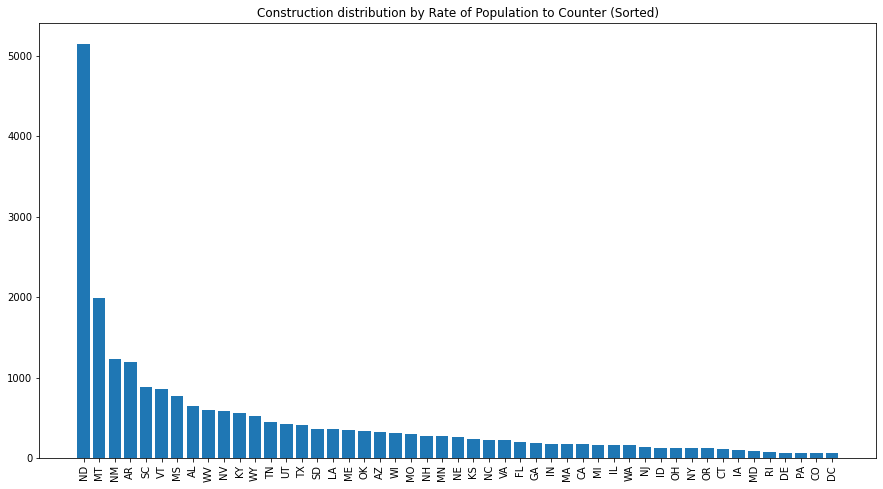

In [64]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['P_C_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Population to Counter (Sorted)")
plt.savefig("construction_distribution_by_Rate_Population_Counter_sorted.png")

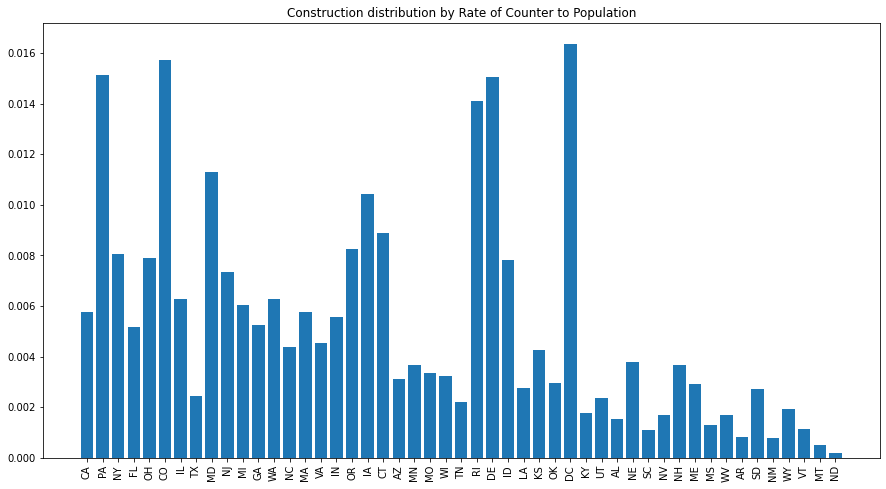

In [65]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['C_P_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Counter to Population")
plt.savefig("construction_distribution_by_Rate_Counter_Population.png")

In [66]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['C_P_Rate'], ascending=False)

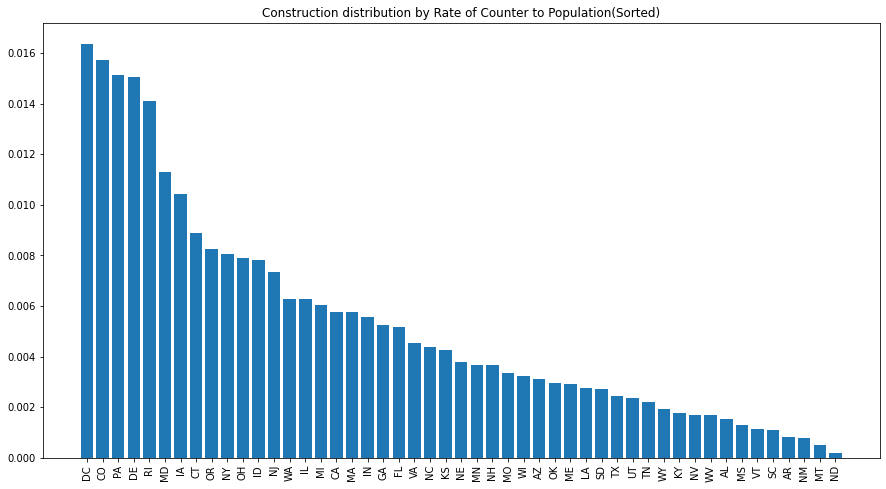

In [67]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['C_P_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Counter to Population(Sorted)")
plt.savefig("construction_distribution_by_Rate_Counter_Population_sorted.png")

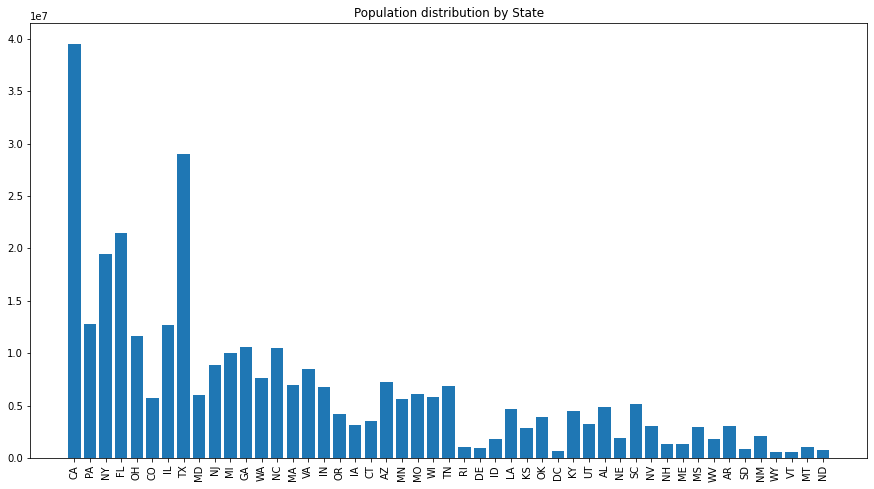

In [68]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['July2019Estimate'])
a = plt.xticks(rotation = 90)
plt.title("Population distribution by State")
plt.savefig("Population_distribution_by_State.png")

In [69]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['July2019Estimate'], ascending=False)

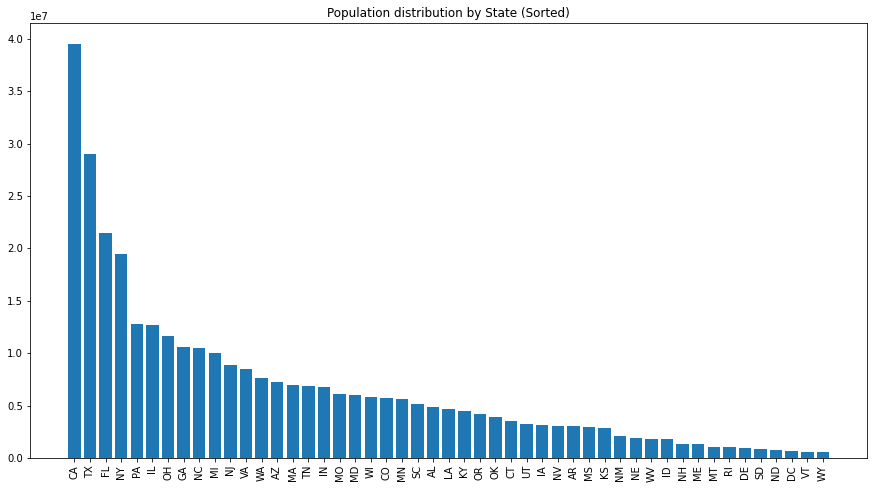

In [70]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['July2019Estimate'])
a = plt.xticks(rotation = 90)
plt.title("Population distribution by State (Sorted)")
plt.savefig("Population_distribution_by_State_Sorted.png")

In [71]:
df_state_count_population["C_A_Rate"] = df_state_count_population["counts"] / df_state_count_population["LandArea(KM2)"]
df_state_count_population["A_C_Rate"] = df_state_count_population["LandArea(KM2)"] / df_state_count_population["counts"]

In [72]:
df_state_count_population.head()

,counts,Rank,July2019Estimate,PercentOfTotal,LandArea(KM2),NewState,C_P_Rate,P_C_Rate,C_A_Rate,A_C_Rate
State,,,,,,,,,,
CA,228658,1,39512223,11.91%,403466,CA,0.005787,172.800527,0.566734,1.764495
PA,193447,6,12801989,3.82%,115883,PA,0.015111,66.178276,1.669330,0.599043
NY,157022,4,19453561,5.86%,122057,NY,0.008072,123.890671,1.286465,0.777324
FL,111021,3,21477737,6.47%,138887,FL,0.005169,193.456526,0.799362,1.250998
OH,92174,7,11689100,3.52%,105829,OH,0.007885,126.815588,0.870971,1.148144


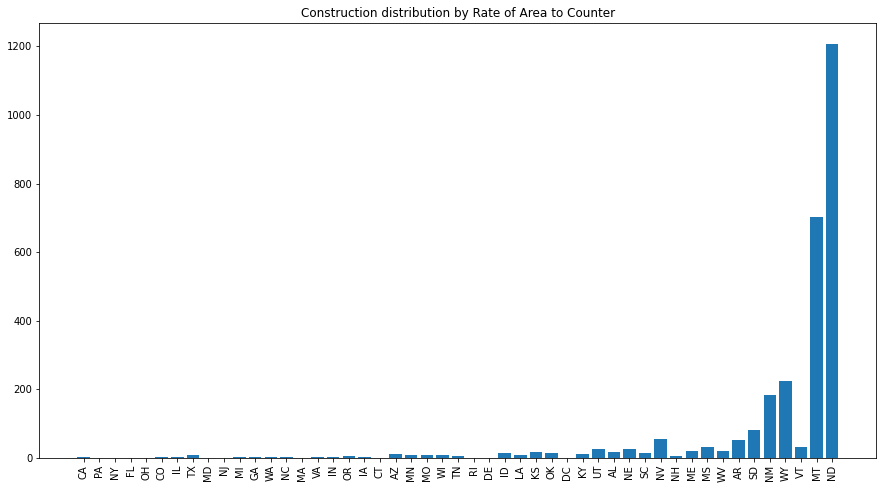

In [73]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['A_C_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Area to Counter")
plt.savefig("construction_distribution_by_Rate_Area_Counter.png")

In [74]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['A_C_Rate'], ascending=False)

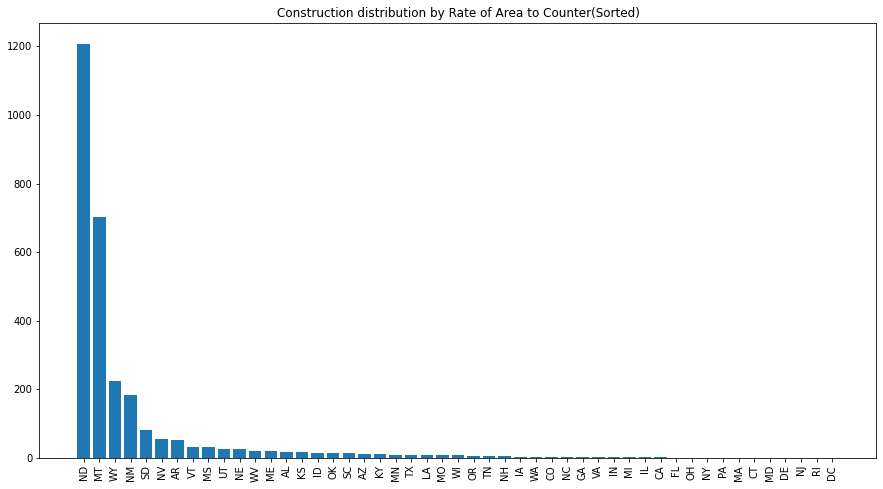

In [75]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['A_C_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Area to Counter(Sorted)")
plt.savefig("construction_distribution_by_Rate_Area_Counter_sorted.png")

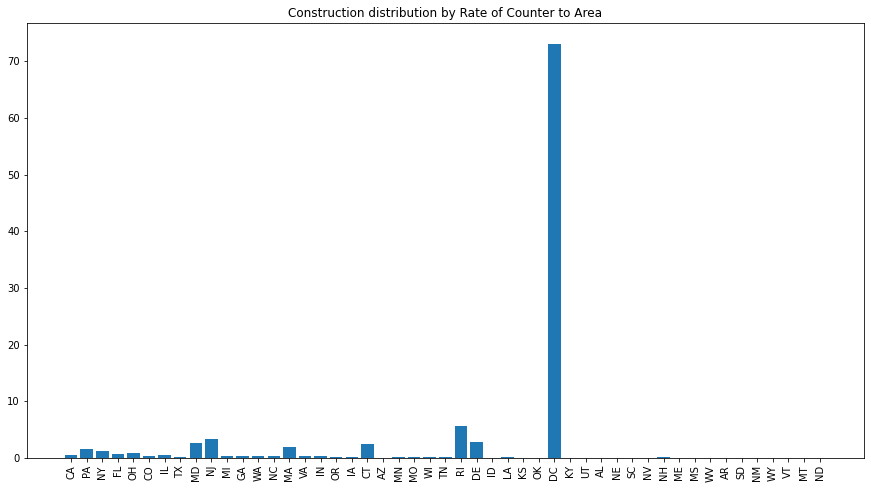

In [76]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['C_A_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Counter to Area")
plt.savefig("construction_distribution_by_Rate_Counter_Area.png")

In [77]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['C_A_Rate'], ascending=False)

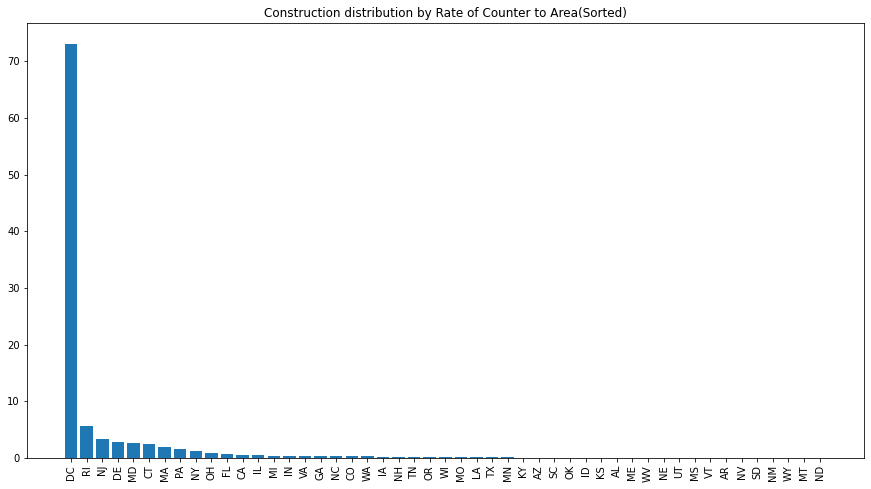

In [78]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['C_A_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Counter to Area(Sorted)")
plt.savefig("construction_distribution_by_Rate_Counter_Area_sorted.png")

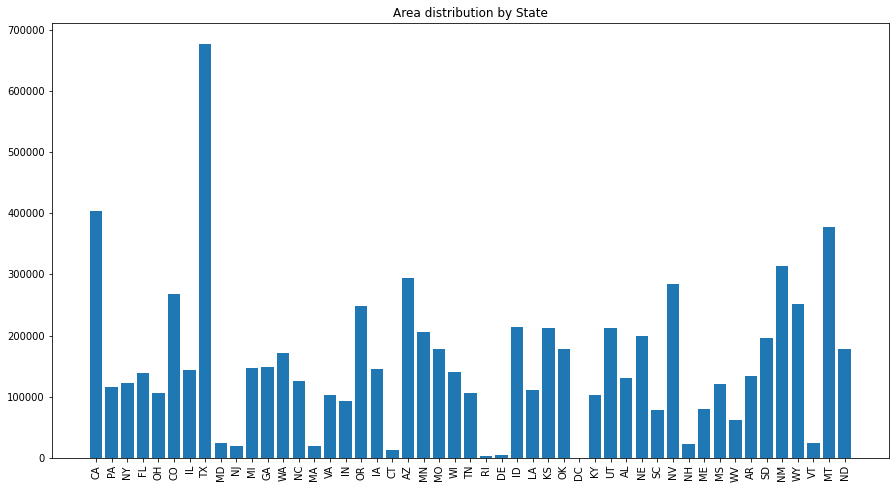

In [79]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['LandArea(KM2)'])
a = plt.xticks(rotation = 90)
plt.title("Area distribution by State")
plt.savefig("Area_distribution_by_State.png")

In [80]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['LandArea(KM2)'], ascending=False)

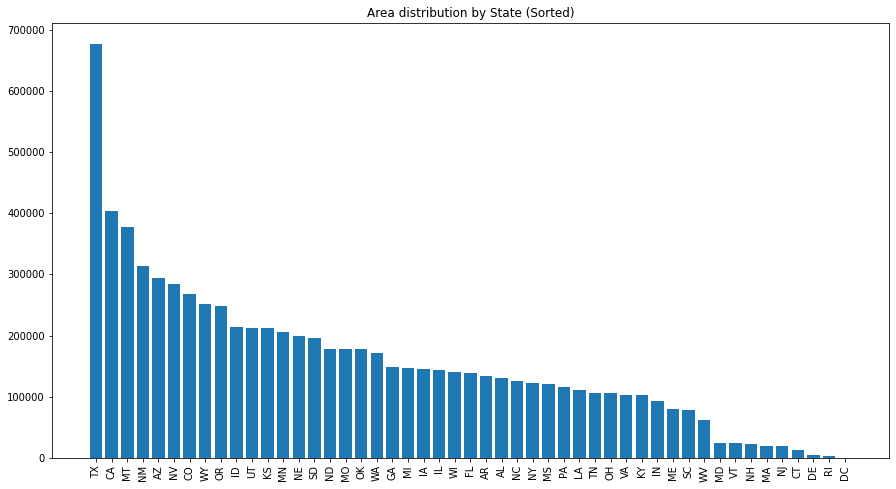

In [81]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['LandArea(KM2)'])
a = plt.xticks(rotation = 90)
plt.title("Area distribution by State (Sorted)")
plt.savefig("Area_distribution_by_State_Sorted.png")

In [82]:
df_state_count_population["P_A_Rate"] = df_state_count_population["July2019Estimate"] / df_state_count_population["LandArea(KM2)"]
df_state_count_population["A_P_Rate"] = df_state_count_population["LandArea(KM2)"] / df_state_count_population["July2019Estimate"]

In [83]:
df_state_count_population.head()

,counts,Rank,July2019Estimate,PercentOfTotal,LandArea(KM2),NewState,C_P_Rate,P_C_Rate,C_A_Rate,A_C_Rate,P_A_Rate,A_P_Rate
State,,,,,,,,,,,,
CA,228658,1,39512223,11.91%,403466,CA,0.005787,172.800527,0.566734,1.764495,97.931977,0.010211
PA,193447,6,12801989,3.82%,115883,PA,0.015111,66.178276,1.669330,0.599043,110.473400,0.009052
NY,157022,4,19453561,5.86%,122057,NY,0.008072,123.890671,1.286465,0.777324,159.380953,0.006274
FL,111021,3,21477737,6.47%,138887,FL,0.005169,193.456526,0.799362,1.250998,154.641810,0.006467
OH,92174,7,11689100,3.52%,105829,OH,0.007885,126.815588,0.870971,1.148144,110.452711,0.009054


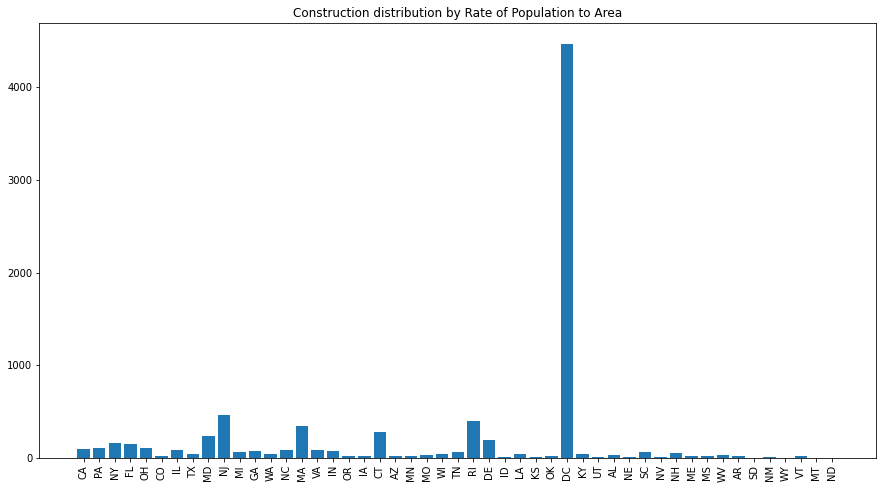

In [84]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['P_A_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Population to Area")
plt.savefig("construction_distribution_by_Rate_Population_Area.png")

In [85]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['P_A_Rate'], ascending=False)

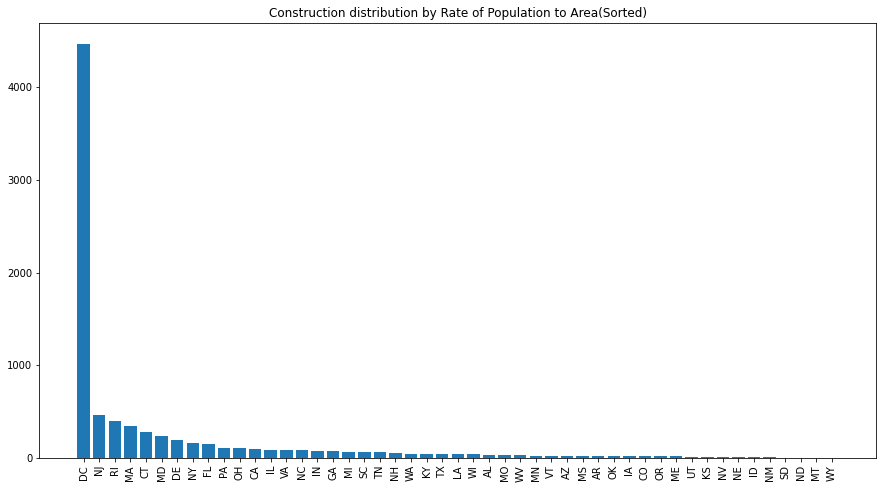

In [86]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['P_A_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Population to Area(Sorted)")
plt.savefig("construction_distribution_by_Rate_Population_Area_Sorted.png")

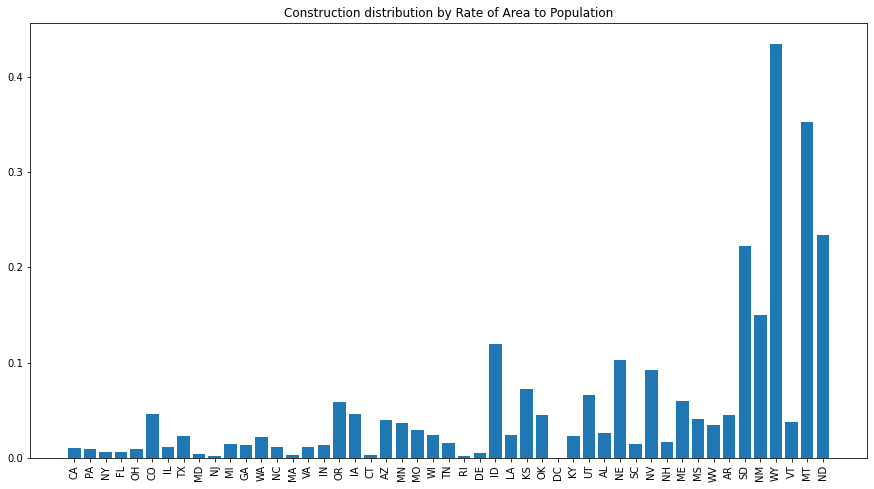

In [87]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population['NewState'], height=df_state_count_population['A_P_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Area to Population")
plt.savefig("construction_distribution_by_Rate_Area_Population.png")

In [88]:
df_state_count_population_sorted = df_state_count_population.sort_values(by=['A_P_Rate'], ascending=False)

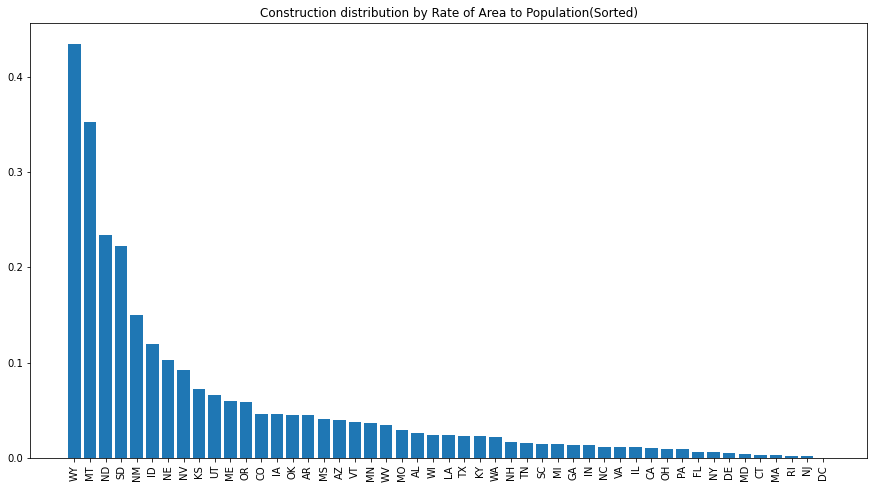

In [89]:
plt.figure(figsize= (15,8))
plt.bar(x=df_state_count_population_sorted['NewState'], height=df_state_count_population_sorted['A_P_Rate'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by Rate of Area to Population(Sorted)")
plt.savefig("construction_distribution_by_Rate_Area_Population_sorted.png")

In [90]:
df_city_group_count.head()

,City,counts
0,Aaronsburg,6
1,Abbeville,20
2,Abbotsford,15
3,Abbott,9
4,Abbottstown,56


In [91]:
df_city_group_count_sorted.head(10)

,City,counts
6830,New York,32755
353,Atlanta,28137
6167,Miami,28037
5586,Los Angeles,19818
7759,Pittsburgh,17540
4501,Houston,14306
7295,Orlando,13940
2440,Denver,13798
7665,Philadelphia,13787
10303,Washington,12576


In [92]:
df_city_group_count_top_10 = df_city_group_count_sorted.head(10)

In [93]:
df_city_group_count_top_10

,City,counts
6830,New York,32755
353,Atlanta,28137
6167,Miami,28037
5586,Los Angeles,19818
7759,Pittsburgh,17540
4501,Houston,14306
7295,Orlando,13940
2440,Denver,13798
7665,Philadelphia,13787
10303,Washington,12576


In [94]:
weather_path = "/home/amin/CETI/RoadConstruction/WeatherEventData/WeatherEvents_Aug16_June20_Publish.csv"

In [95]:
weather_data = read_data(weather_path)

In [96]:
weather_data.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode
0,W-310,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
1,W-311,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
2,W-312,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
3,W-313,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
4,W-314,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0


In [97]:
weather_data["NewState"] = weather_data["State"]

In [98]:
weather_data.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode,NewState
0,W-310,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO
1,W-311,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO
2,W-312,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO
3,W-313,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO
4,W-314,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO


In [99]:
df_state_count_sorted.head()

,State,counts
3,CA,228658
36,PA,193447
32,NY,157022
8,FL,111021
33,OH,92174


In [102]:
weather_data_State = weather_data.loc[:, weather_data.columns.intersection(['City', 'State', "Id", "AirportCode", "Type", "NewState"])]

In [103]:
weather_data_State.head()

,Type,AirportCode,City,State
0,Rain,K04V,Saguache,CO
1,Rain,K04V,Saguache,CO
2,Rain,K04V,Saguache,CO
3,Rain,K04V,Saguache,CO
4,Rain,K04V,Saguache,CO


In [110]:
weather_data_State_group = weather_data_State.groupby(["State", "Type"])

In [111]:
weather_data_State_group_count = weather_data_State_group.size().reset_index(name='counts')

In [115]:
weather_data_State_group_count.head(10)

,State,Type,counts
0,AL,Cold,2844
1,AL,Fog,22503
2,AL,Hail,44
3,AL,Precipitation,2575
4,AL,Rain,84746
5,AL,Snow,599
6,AL,Storm,57
7,AR,Cold,2301
8,AR,Fog,20123
9,AR,Hail,8


In [116]:
weather_data_State_group_count_Cold = weather_data_State_group_count[weather_data_State_group_count.Type == "Cold"]

In [117]:
weather_data_State_group_count_Cold.head()

,State,Type,counts
0,AL,Cold,2844
7,AR,Cold,2301
14,AZ,Cold,1374
21,CA,Cold,8226
28,CO,Cold,2643


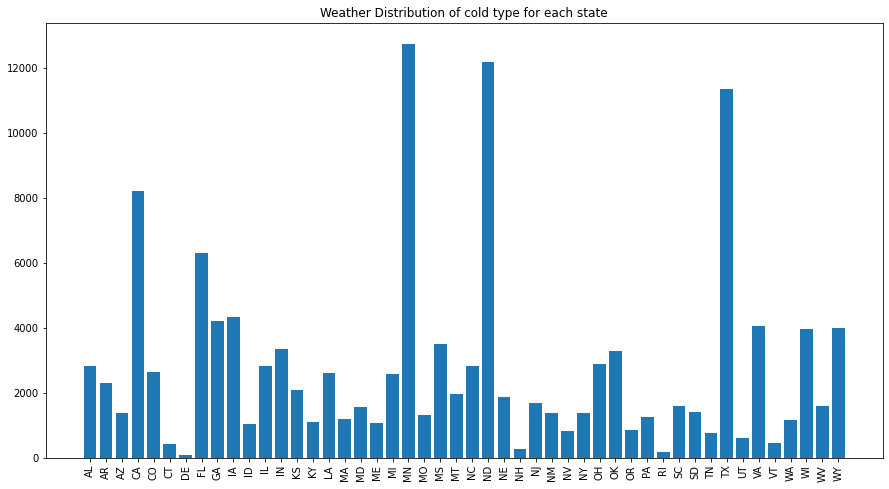

In [122]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Cold['State'], height=weather_data_State_group_count_Cold['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of cold type for each state")
plt.savefig("Weather_Distribution_cold_type_for_each_state.png")

In [123]:
weather_data_State_group_count_Fog = weather_data_State_group_count[weather_data_State_group_count.Type == "Fog"]

In [124]:
weather_data_State_group_count_Fog.head()

,State,Type,counts
1,AL,Fog,22503
8,AR,Fog,20123
15,AZ,Fog,5956
22,CA,Fog,84941
29,CO,Fog,21390


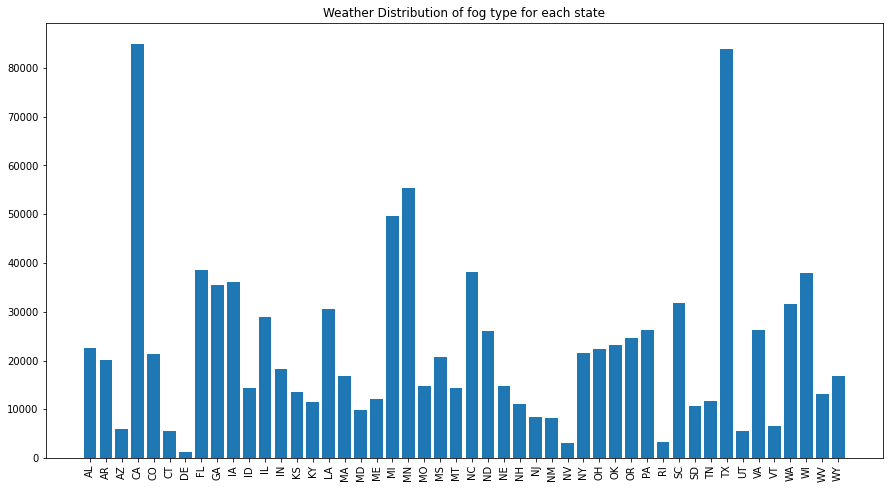

In [125]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Fog['State'], height=weather_data_State_group_count_Fog['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of fog type for each state")
plt.savefig("Weather_Distribution_fog_type_for_each_state.png")

In [126]:
weather_data_State_group_count_Hail = weather_data_State_group_count[weather_data_State_group_count.Type == "Hail"]

In [127]:
weather_data_State_group_count_Hail.head()

,State,Type,counts
2,AL,Hail,44
9,AR,Hail,8
16,AZ,Hail,7
23,CA,Hail,19
30,CO,Hail,68


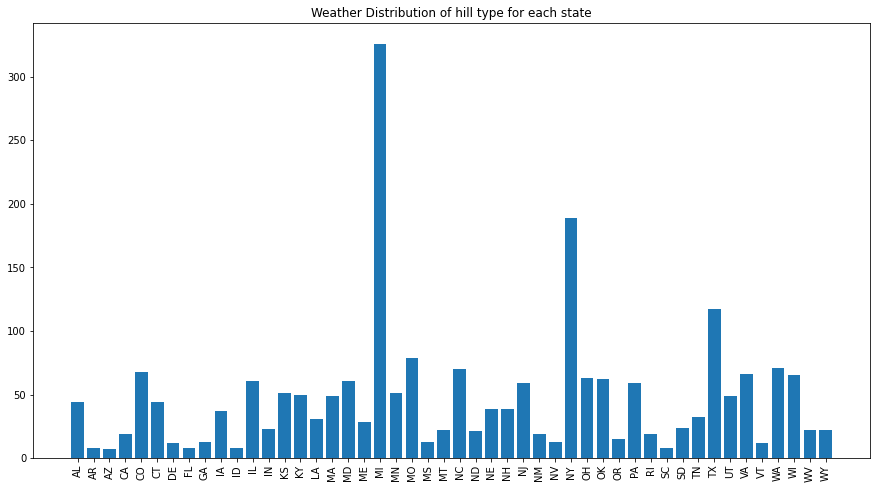

In [128]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Hail['State'], height=weather_data_State_group_count_Hail['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of hill type for each state")
plt.savefig("Weather_Distribution_hill_type_for_each_state.png")

In [129]:
weather_data_State_group_count_Precipitation = weather_data_State_group_count[weather_data_State_group_count.Type == "Precipitation"]

In [130]:
weather_data_State_group_count_Precipitation.head()

,State,Type,counts
3,AL,Precipitation,2575
10,AR,Precipitation,2453
17,AZ,Precipitation,249
24,CA,Precipitation,1390
31,CO,Precipitation,403


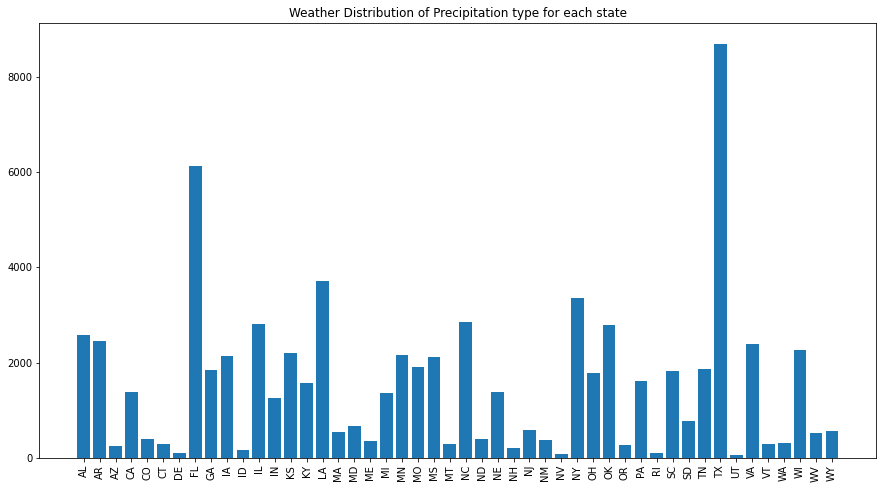

In [131]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Precipitation['State'], height=weather_data_State_group_count_Precipitation['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Precipitation type for each state")
plt.savefig("Weather_Distribution_Precipitation_type_for_each_state.png")

In [132]:
weather_data_State_group_count_Rain = weather_data_State_group_count[weather_data_State_group_count.Type == "Rain"]

In [133]:
weather_data_State_group_count_Rain.head()

,State,Type,counts
4,AL,Rain,84746
11,AR,Rain,63851
18,AZ,Rain,24273
25,CA,Rain,94140
32,CO,Rain,50551


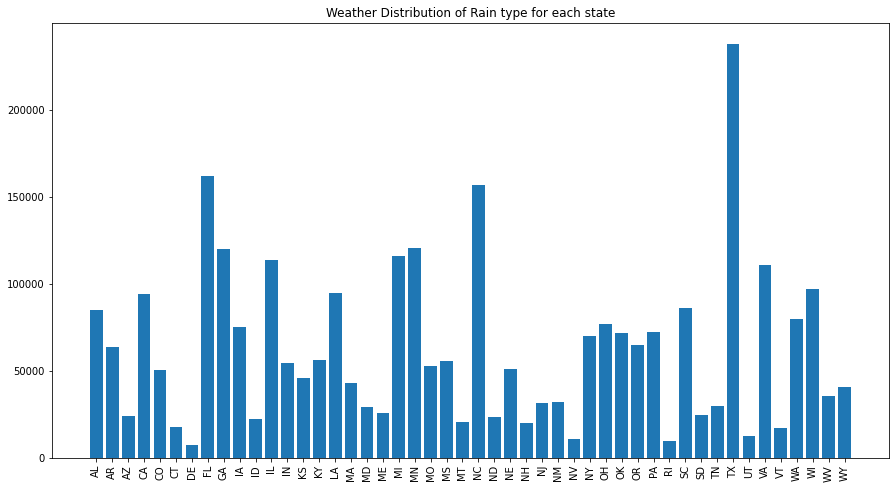

In [134]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Rain['State'], height=weather_data_State_group_count_Rain['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Rain type for each state")
plt.savefig("Weather_Distribution_Rain_type_for_each_state.png")

In [135]:
weather_data_State_group_count_Snow = weather_data_State_group_count[weather_data_State_group_count.Type == "Snow"]

In [136]:
weather_data_State_group_count_Snow.head()

,State,Type,counts
5,AL,Snow,599
12,AR,Snow,1471
19,AZ,Snow,4740
26,CA,Snow,8592
33,CO,Snow,37431


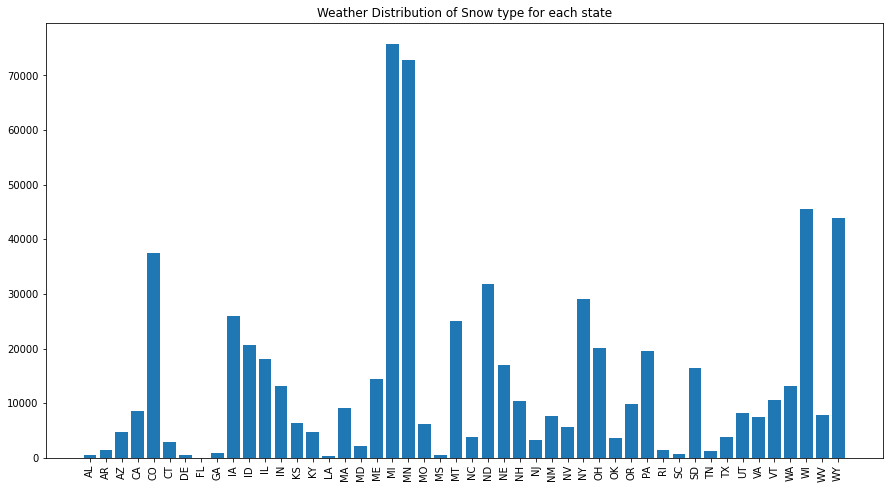

In [137]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Snow['State'], height=weather_data_State_group_count_Snow['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Snow type for each state")
plt.savefig("Weather_Distribution_Snow_type_for_each_state.png")

In [138]:
weather_data_State_group_count_Storm = weather_data_State_group_count[weather_data_State_group_count.Type == "Storm"]

In [139]:
weather_data_State_group_count_Storm.head()

,State,Type,counts
6,AL,Storm,57
13,AR,Storm,104
20,AZ,Storm,458
27,CA,Storm,1332
34,CO,Storm,5986


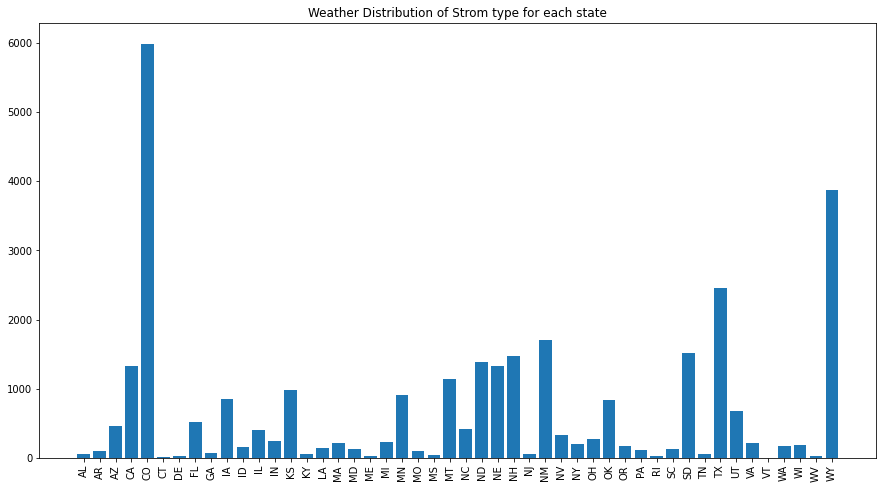

In [140]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Storm['State'], height=weather_data_State_group_count_Storm['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Strom type for each state")
plt.savefig("Weather_Distribution_Strom_type_for_each_state.png")

In [141]:
weather_data_State_group_only = weather_data_State.groupby(["State"])

In [142]:
weather_data_State_group_only_count = weather_data_State_group_only.size().reset_index(name='counts')

In [143]:
weather_data_State_group_only_count.head()

,State,counts
0,AL,113368
1,AR,90311
2,AZ,37057
3,CA,198640
4,CO,118472


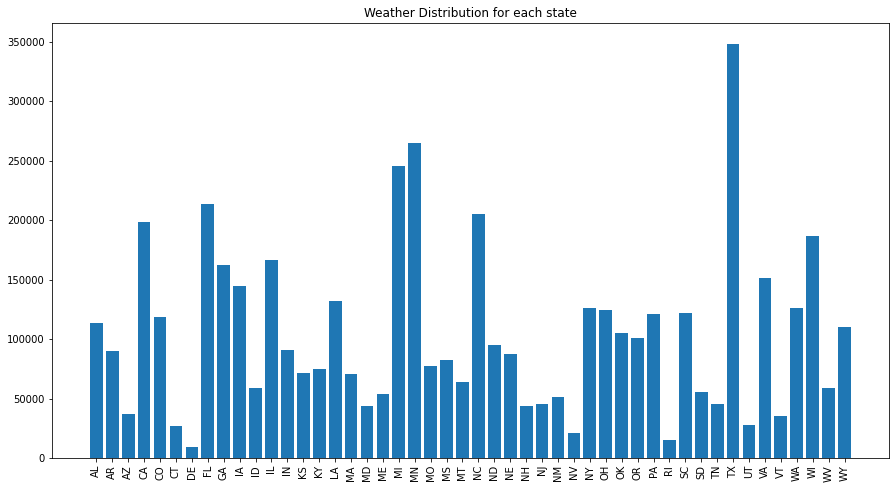

In [144]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_only_count['State'], height=weather_data_State_group_only_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution for each state")
plt.savefig("Weather_Distribution_for_each_state.png")

In [104]:
df_state_count_sorted_weather = df_state_count_sorted.set_index('State').join(weather_data_State.set_index('State'))

In [105]:
df_state_count_sorted_weather.head()

,counts,Type,AirportCode,City
State,,,,
AL,7541,Rain,K0J4,Florala
AL,7541,Rain,K0J4,Florala
AL,7541,Rain,K0J4,Florala
AL,7541,Rain,K0J4,Florala
AL,7541,Rain,K0J4,Florala
